사용자
	로그인
	비밀번호 변경
	회원가입
	나의데이터
		등록
		수정
		삭제
		조회
	공개데이터 조회
	지오코딩
	시각화(차트, 그래프, 지도)
	데이터요청
		등록
		수정
		삭제
		조회
	사용자데이터 매칭 조회(지도기반)
관리자
	사용자관리		
		등록
		수정
		삭제
		조회
	공개데이터
		등록
		수정
		삭제
		조회
	사용자데이터관리
		조회
		삭제
	데이터사용현황
	사용자접속현황
	환경설정
		업로드 데이터 사이즈

데이터 가공
	수집
	분석
	저장
	시각화
	마트구축
	큐브생성
	서비스 데이터 적재


In [ ]:
from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [11]:
# conda install -c conda-forge ipywidgets 설치 필요
# jupyter nbextension enable --py widgetsnbextension
from IPython.display import display
text = widgets.Text()
display(text)

def handler_submit(sender):
    print(text.value)
    
text.on_submit(handler_submit)

Text(value='')

In [12]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print('Button clicked.')
    
button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

In [16]:
def f(x):
    print(x)

interact(f,x='text')

interactive(children=(Text(value='text', description='x'), Output()), _dom_classes=('widget-interact',))

<function __main__.f>

In [18]:
outputText = widgets.Text()
outputText

Text(value='')

In [20]:
inputText = widgets.Text()

def makeUpperCase(sender):
    outputText.value = inputText.value.upper()
    
inputText.on_submit(makeUpperCase)
inputText

Text(value='')

In [37]:
from IPython.html.widgets import *
import matplotlib.pyplot as  plt
import numpy as np

t = np.arange(0.0,1.0,0.01)

def pltsin(f):
    plt.plot(x,sin(2*pi*t*f))
    plt.show()
    
interact(pltsin,f=(1,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='f', max=10.0, min=1.0), Output()), _dom_classes=('widget-interact',))

<function __main__.pltsin>

Text(value='', description='Domain to ping')

<IPython.core.display.Javascript object>


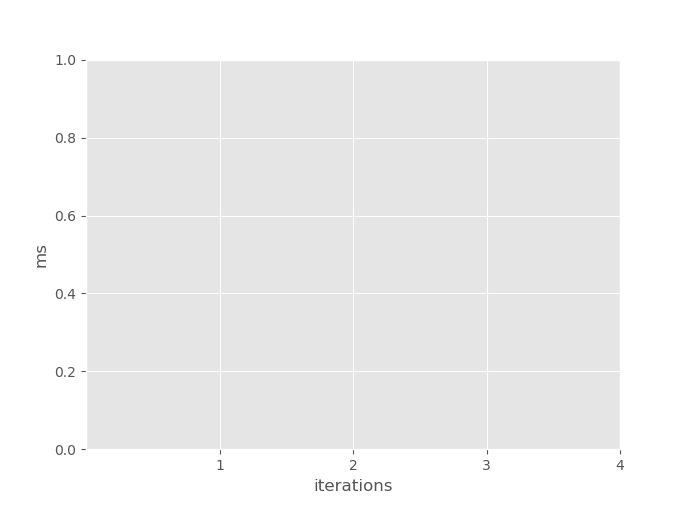

HBox()

Domain gave error on pinging


In [40]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

# displaying the text widget
text = widgets.Text(description="Domain to ping", width=200)
display(text)

# preparing the plot 
data = pd.DataFrame()
x = range(1,NUMBER_OF_PINGS+1)
plots = dict()
fig, ax = plt.subplots()
plt.xlabel('iterations')
plt.ylabel('ms')
plt.xticks(x)
plt.show()

# preparing a container to put in created checkbox per domain
checkboxes = []
cb_container = widgets.HBox()
display(cb_container)

# add button that updates the graph based on the checkboxes
button = widgets.Button(description="Update the graph")

# function to deal with the added domain name
def handle_submit(sender):
    # a part of the magic inside python : pinging
    res = !ping -c {NUMBER_OF_PINGS} {text.value}
    hits = res.grep('64 bytes').fields(-2).s.replace("time=","").split()
    if len(hits) == 0:
        print("Domain gave error on pinging")
    else:
         # rebuild plot based on ping result
        data = hits
        data = data.astype(float)
        plots, = ax.plot(x, data, label=text.value)
        plt.legend()
        plt.draw()
        # add a new checkbox for the new domain
        checkboxes.append(widgets.Checkbox(description = text.value, value=True, width=90))
        cb_container.children=[i for i in checkboxes]
        if len(checkboxes) == 1:
            display(button)

# function to deal with the checkbox update button       
def on_button_clicked(b):
    for c in cb_container.children:
        if not c.value:
            plots.set_visible(False)
        else:
            plots.set_visible(True)
    plt.legend()
    plt.draw()

button.on_click(on_button_clicked)
text.on_submit(handle_submit)
plt.show()